In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Preprocessing the data

In [3]:
df.shape

(4177, 9)

#### We have 4177 entries and 9 parameters

In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### The minimum entry in Height column is 0, which is impossible, so we drop these entries.

In [5]:
df = df[df['Height'] != 0]
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### We have to predict the age of the abalone, which is number of rings + 1.5, so we rename rings column and increase its values.

In [6]:
df.rename({'Rings': 'Age'}, axis=1, inplace=True)
df['Age'] = df['Age'] + 1.5
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


#### Checking and removing features that are highly correlated

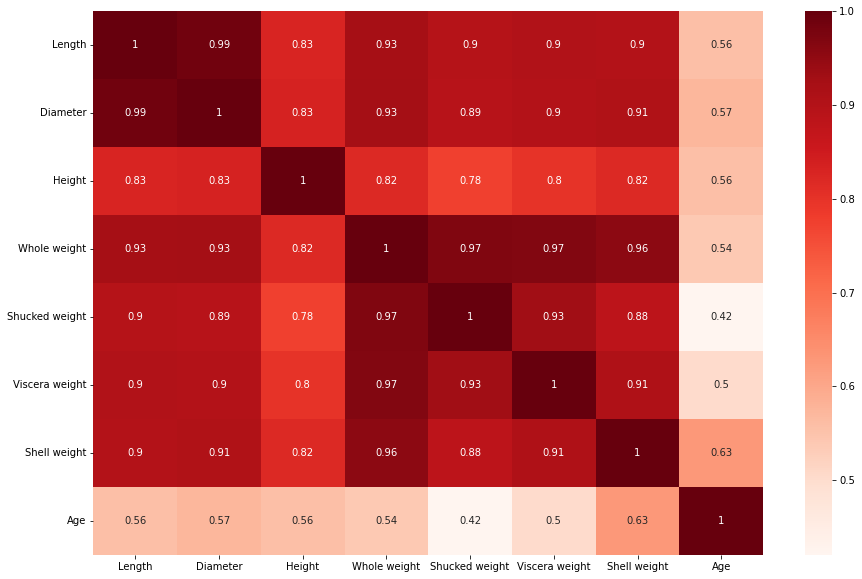

In [8]:
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

#### High positive correlation b/w some features.

In [9]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
to_drop

['Diameter', 'Shucked weight', 'Viscera weight', 'Shell weight']

In [10]:
df.drop(to_drop, axis=1, inplace=True)
df.head()

,Sex,Length,Height,Whole weight,Age
0,M,0.455,0.095,0.5140,16.5
1,M,0.350,0.090,0.2255,8.5
2,F,0.530,0.135,0.6770,10.5
3,M,0.440,0.125,0.5160,11.5
4,I,0.330,0.080,0.2050,8.5


#### Standardising the input data using StandardScaler

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.columns[1:-1]] = scaler.fit_transform(df[df.columns[1:-1]])
df.head()

,Sex,Length,Height,Whole weight,Age
0,M,-0.575276,-1.068619,-0.642485,16.5
1,M,-1.449876,-1.188465,-1.230912,8.5
2,F,0.049438,-0.109856,-0.310030,10.5
3,M,-0.700219,-0.349547,-0.638406,11.5
4,I,-1.616466,-1.428155,-1.272724,8.5


#### Coding gender as integer, I = 0, M = 1, F = 2

In [13]:
df['Sex'].replace(['I','M','F'], [0,1,2], inplace=True)
df.head()

,Sex,Length,Height,Whole weight,Age
0,1,-0.575276,-1.068619,-0.642485,16.5
1,1,-1.449876,-1.188465,-1.230912,8.5
2,2,0.049438,-0.109856,-0.310030,10.5
3,1,-0.700219,-0.349547,-0.638406,11.5
4,0,-1.616466,-1.428155,-1.272724,8.5


#### Splitting data into train test sets with seed 0

In [14]:
train = df.sample(frac=0.8, random_state=0)
test = df.drop(train.index)
print('Training set size:', train.shape[0])
print('Testing set size:', test.shape[0])

Training set size: 3340
Testing set size: 835


#### Splitting data into input and output

In [15]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

## Part 1: Performing Linear Regression
#### Linear regression will be implemented using gradient descent

In [60]:
class LinearRegression():
    def __init__(self, alpha, max_iter, threshold):
        self.alpha = alpha
        self.max_iter = max_iter
        self.threshold = threshold
    
    def fit(self, x, y):
        # number of training samples and numebr of features
        m, n = x.shape
        # initialising weights and bias
        self.w = np.zeros(n)
        self.b = 0
        
        # iterating until error is negligible or max number of iterations is reached
        for i in range(self.max_iter):
            y_pred = self.predict(x)
            if(error(y_pred, y) < self.threshold):
                break
            self.update(x, y, y_pred)
    
    def update(self, x, y, y_pred):
        m, n = x.shape
        # gradients for weights and bias
        dw = -( 2 * (x.T).dot(y - y_pred) ) / m
        db = -( 2 * np.sum(y - y_pred) ) / m
        
        # updating the weights
        self.w = self.w - self.alpha * dw
        self.b = self.b - self.alpha * db
    
    def predict(self, x):
        return x.dot(self.w) + self.b
    # class ends here

def error(y_pred, y):
    # calculates RMSE for the given predictions
    e = np.sum((y - y_pred)**2) / len(y)
    return np.sqrt(e)

In [161]:
# training the model
model = LinearRegression(0.01, 500, 1e-6)
model.fit(X_train, y_train)

In [162]:
# RMSE on training set
y_pred = model.predict(X_train)
rmse = error(y_pred, y_train)
print('RMSE on training set is:', rmse)

RMSE on training set is: 2.580481923891489


In [163]:
# RMSE on testing set
y_pred = model.predict(X_test)
rmse = error(y_pred, y_test)
print('RMSE on testing set is:', rmse)

RMSE on testing set is: 2.8679157555606984


## Part 2: Ridge regression and lasso regression

## A: Ridge and Lasso regression

### Ridge regression

In [230]:
from sklearn.linear_model import Ridge
alphas = {'alpha': [1e-5, 1e-3, 1e-2, 1e-1, 5e-1, 1.0, 5.0, 25.0, 100.0, 250.0, 1000.0, 5000.0, 10000.0]}
scores = []
coeffs = []

for i in range(len(alphas['alpha'])):
    model = Ridge(alpha=alphas['alpha'][i])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(error(y_pred, y_test))
    coeffs.append(model.coef_)

print('alpha values:')
alphas['alpha']

alpha values:


[1e-05,
 0.001,
 0.01,
 0.1,
 0.5,
 1.0,
 5.0,
 25.0,
 100.0,
 250.0,
 1000.0,
 5000.0,
 10000.0]

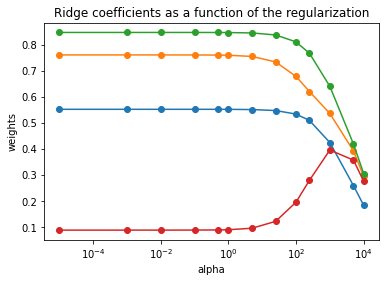

In [231]:
ax = plt.gca()

ax.plot(alphas['alpha'], coeffs, marker='o')
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

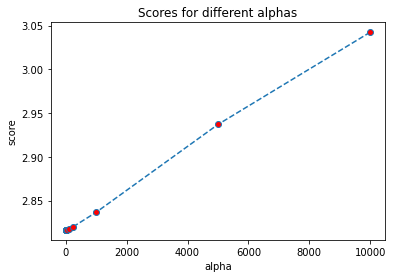

In [232]:
# plotting scores vs alpha
plt.plot(alphas['alpha'], scores, marker='o', markerfacecolor='red', linestyle='dashed')
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('Scores for different alphas')
plt.show()

#### Our model shows consistent performance across most low alpha values, only after increasing the value of alpha beyond the thousands does the RMSE noticably increase
#### What this may mean is that we have correctly identified the useful features during feature selection, so the performance of the model remains consistent

In [233]:
idx = np.argmin(scores)
best_coef_ridge = coeffs[idx]
print('The best performing parameter value in Ridge regression is:', alphas['alpha'][idx], 'with an RMSE of:', scores[idx])
print('Best performing coefficients are:', best_coef_ridge)

The best performing parameter value in Ridge regression is: 1e-05 with an RMSE of: 2.8165659255656754
Best performing coefficients are: [0.55172339 0.76053623 0.84689368 0.08772778]


### Lasso regression

In [235]:
from sklearn.linear_model import Lasso
scores = []
coeffs = []

for i in range(len(alphas['alpha'])):
    model = Lasso(alpha=alphas['alpha'][i])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(error(y_pred, y_test))
    coeffs.append(model.coef_)

print('alpha values:')
alphas['alpha']

alpha values:


[1e-05,
 0.001,
 0.01,
 0.1,
 0.5,
 1.0,
 5.0,
 25.0,
 100.0,
 250.0,
 1000.0,
 5000.0,
 10000.0]

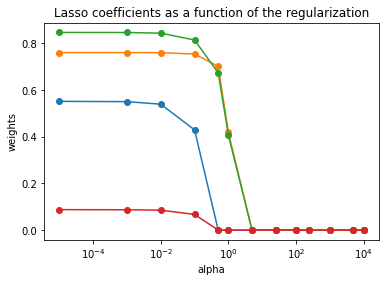

In [237]:
ax = plt.gca()

ax.plot(alphas['alpha'], coeffs, marker='o')
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

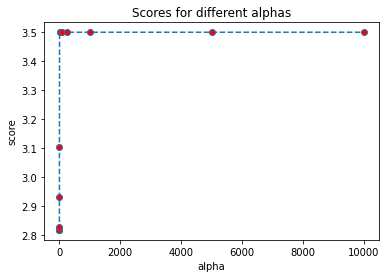

In [236]:
# plotting scores vs alpha
plt.plot(alphas['alpha'], scores, marker='o', markerfacecolor='red', linestyle='dashed')
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('Scores for different alphas')
plt.show()

#### Our model shows consistent performance across alpha values less than 1, afterwards increasing the value of alpha increases the RMSE noticably
#### What this may mean is that we have correctly identified the useful features during feature selection, so the performance of the model remains consistent

In [238]:
idx = np.argmin(scores)
best_coef_lasso = coeffs[idx]
print('The best performing parameter value in Lasso regression is:', alphas['alpha'][idx], 'with an RMSE of:', scores[idx])
print('Best performing coefficients are:', best_coef_lasso)

The best performing parameter value in Lasso regression is: 1e-05 with an RMSE of: 2.816566685747256
Best performing coefficients are: [0.55170966 0.7605449  0.84689456 0.08771438]


## B: Grid Search

### Ridge regression

In [239]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
models = GridSearchCV(ridge, alphas, scoring='neg_root_mean_squared_error')
models.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 25.0,
                                   100.0, 250.0, 1000.0, 5000.0, 10000.0]},
             scoring='neg_root_mean_squared_error')

In [240]:
print('The best performing parameter value in Ridge regression is:', models.best_estimator_.alpha,
      'with an RMSE of:', -models.best_score_)
coef = models.best_estimator_.coef_
print('Best performing coefficients are:', coef)

The best performing parameter value in Ridge regression is: 1000.0 with an RMSE of: 2.5576014778350538
Best performing coefficients are: [0.42417945 0.53567875 0.64001509 0.39533213]


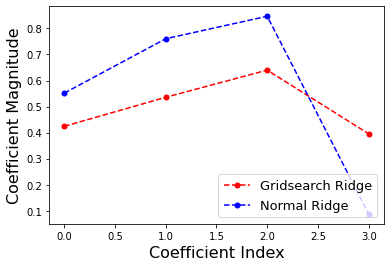

In [243]:
plt.plot(coef, linestyle='dashed', marker='o', markersize=5, color='red', label='Gridsearch Ridge')
plt.plot(best_coef_ridge, linestyle='dashed', marker='o', markersize=5, color='blue', label='Normal Ridge')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

#### Gridsearch coefficients are larger because the alpha chosen is larger, shrinking the coefficients more, which means larger coefficients are needed

#### GridSearchCV returns a different optimal alpha value and also lower RMSE across the board, this may be due to cross validation being used

### Lasso regression

In [245]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
models = GridSearchCV(lasso, alphas, scoring='neg_root_mean_squared_error')
models.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 25.0,
                                   100.0, 250.0, 1000.0, 5000.0, 10000.0]},
             scoring='neg_root_mean_squared_error')

In [246]:
print('The best performing parameter value in Lasso regression is:', models.best_estimator_.alpha,
      'with an RMSE of:', -models.best_score_)
coef = models.best_estimator_.coef_
print('Best performing coefficients are:', coef)

The best performing parameter value in Lasso regression is: 0.1 with an RMSE of: 2.622142891683688
Best performing coefficients are: [0.42934846 0.75439959 0.8145     0.06735914]


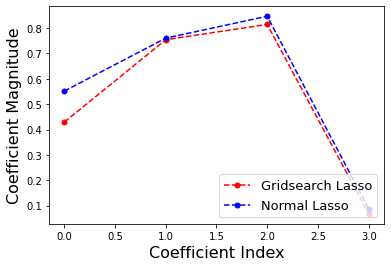

In [247]:
plt.plot(coef, linestyle='dashed', marker='o', markersize=5, color='red', label='Gridsearch Lasso')
plt.plot(best_coef_ridge, linestyle='dashed', marker='o', markersize=5, color='blue', label='Normal Lasso')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

#### Gridsearch coefficients are similar in size because alpha is small, so less shrinking is done

#### GridSearchCV returns a different optimal alpha value and also lower RMSE across the board, this may be due to cross validation being used